<a href="https://colab.research.google.com/github/tazkiyyahia/tazkiyyahia/blob/main/CANCER_CLASSIFICATION_MULTICLASS_(ROC_AUC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving data hasil fcbf fix-pheno.csv to data hasil fcbf fix-pheno.csv


INSTALL ALL MODULES&PACKAGES

In [2]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from collections import Counter
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split  
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from lightgbm import LGBMModel
from lightgbm import LGBMRanker 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import sklearn.metrics as metrics
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from imblearn.over_sampling import SMOTENC
from imblearn.metrics import classification_report_imbalanced


In [59]:
from sklearn.metrics import precision_recall_curve

DATASET

In [3]:
df = pd.read_csv('data hasil fcbf fix-pheno.csv')
df.head()
df.shape

(73, 41)

MENDEFINISIKAN CATEGORICAL FEATURE UNTUK LIGHTGBM

In [4]:
cols = ["ethnic.ch1","m.stage.ch1","Sex.ch1"]
for item in cols:
    df[item] = df[item].astype("category").cat.codes +1



LABEL ENCODER

In [5]:
labelencoder=LabelEncoder()
df['class'] = labelencoder.fit_transform(df['subgroup.ch1'])
df[["subgroup.ch1","class"]]

#df_y=df[["subgroup.ch1","class"]]
#df_y.to_csv('data Y.csv', index=False)
#downloaded=files.download('data Y.csv')

,subgroup.ch1,class
0,G4,1
1,G4,1
2,WNT,3
3,G4,1
4,SHH,2
...,...,...
68,SHH,2
69,G4,1
70,SHH,2
71,G4,1


FEATURE&CLASS

(73,)

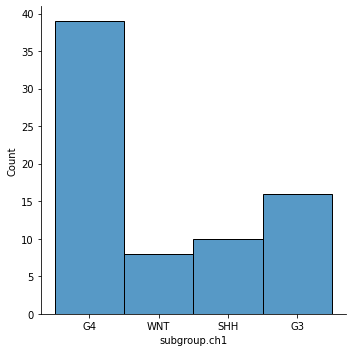

In [6]:
sns.displot(df, x="subgroup.ch1")
X = df.drop(['subgroup.ch1','class'], axis=1)
Y = df['class']
Y.shape

TRAINING-TESTING (70-30%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print('Train size :',X_train.shape, y_train.shape)
print('Test size  :', X_test.shape, y_test.shape)

(51, 40)
(22, 40)
(22,)
(51,)
Train size : (51, 40) (51,)
Test size  : (22, 40) (22,)


MELIHAT JUMLAH MASING-MASING KELAS

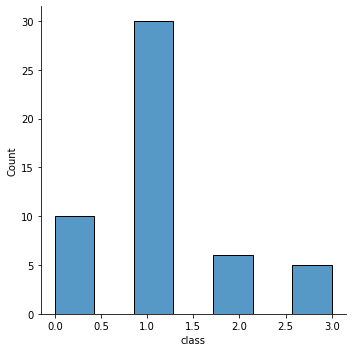

In [8]:
y_train_ = pd.DataFrame(data=y_train,columns=['class'])
sns.displot(y_train_, x="class")

MODEL LIGHTGBM TANPA RESAMPLING

In [9]:
param_dict = {
    'num_leaves': [4, 8, 12, 20],
    'max_depth': [1,2,3,4,5,6,7,8],
    'learning_rate':[0.1,0.3,0.5,0.7,0.9]
    }


clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss')

gs=GridSearchCV(clf, param_dict, scoring='accuracy', verbose=1,cv=5, n_jobs=1)
gs.fit(X_train,y_train)
gs.best_params_
gs.best_score_
gs.best_estimator_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


LGBMClassifier(max_depth=1, metric='multi_logloss', num_class=4, num_leaves=4,
               objective='multiclass')

HASIL ORIGINAL TANPA RESAMPLING

In [10]:
predict_grid = gs.predict(X_test)
print("nilai f-1 score       : %0.3f"% metrics.f1_score(y_test, predict_grid, average='macro'))
print("nilai akurasi         : %0.3f"% metrics.accuracy_score(y_test, predict_grid))

print('Original Results:',classification_report(y_test, predict_grid))
print(confusion_matrix(y_test, predict_grid))
print('Akurasi original test = ', accuracy_score(y_test, predict_grid))


nilai f-1 score       : 0.966
nilai akurasi         : 0.955
Original Results:               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           0.95        22
   macro avg       0.96      0.97      0.97        22
weighted avg       0.96      0.95      0.95        22

[[6 0 0 0]
 [1 8 0 0]
 [0 0 4 0]
 [0 0 0 3]]
Akurasi original test =  0.9545454545454546


In [11]:
print(predict_grid)

[1 0 3 2 2 3 1 0 0 0 2 0 1 1 1 3 0 0 1 1 2 1]


CONFUSSION MATRIX ORIGINAL 

['Class 0', 'Class 1', 'Class 2', 'Class 3']


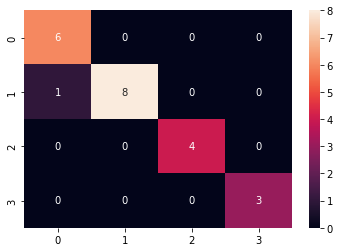

In [12]:
classes =[]
labeles=np.unique(y_train)
for v in labeles:
    classes.append('Class '+ str(v))
print(classes)
classes

cnf_matrix = confusion_matrix(y_test, predict_grid, labels=labeles)
cnf_matrix

f = sns.heatmap(cnf_matrix, annot=True)

****LGB TRAIN ORIGINAL **********************************

DATASET&CATEGORICAL FEATURE

In [13]:
lgb_train = lgb.Dataset(X_train, label= y_train)
lgb_test = lgb.Dataset(X_test, y_test)
cate_features_name = ["ethnic.ch1","m.stage.ch1","Sex.ch1"]

TRAINING MODEL

In [14]:
param = {
'boosting_type': 'gbdt',
'objective': 'multiclass',
'metric': 'multi_logloss',
'num_class':4,
'max_depth':1,
'num_leaves':4,
'learning_rate':0.1
}

gbm = lgb.train(
param,
lgb_train,
categorical_feature = cate_features_name,
num_boost_round=100,
valid_sets=[lgb_train, lgb_test],
early_stopping_rounds=10
)

gbm.best_iteration
gbm.best_score


[1]	training's multi_logloss: 1.03921	valid_1's multi_logloss: 1.28661
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 0.972346	valid_1's multi_logloss: 1.22007
[3]	training's multi_logloss: 0.911803	valid_1's multi_logloss: 1.15934
[4]	training's multi_logloss: 0.85578	valid_1's multi_logloss: 1.10015
[5]	training's multi_logloss: 0.804159	valid_1's multi_logloss: 1.04521
[6]	training's multi_logloss: 0.757026	valid_1's multi_logloss: 1.00042
[7]	training's multi_logloss: 0.712879	valid_1's multi_logloss: 0.946324
[8]	training's multi_logloss: 0.671325	valid_1's multi_logloss: 0.898597
[9]	training's multi_logloss: 0.633029	valid_1's multi_logloss: 0.858381
[10]	training's multi_logloss: 0.596795	valid_1's multi_logloss: 0.812015
[11]	training's multi_logloss: 0.563122	valid_1's multi_logloss: 0.779697
[12]	training's multi_logloss: 0.531594	valid_1's multi_logloss: 0.739934
[13]	training's multi_logloss: 0.502047	valid_1's multi_logloss: 0.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Sex.ch1', 'ethnic.ch1', 'm.stage.ch1']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


defaultdict(dict,
            {'training': {'multi_logloss': 0.0071783031681948},
             'valid_1': {'multi_logloss': 0.08835638082245029}})

HASIL PREDIKSI KELAS

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           0.95        22
   macro avg       0.96      0.97      0.97        22
weighted avg       0.96      0.95      0.95        22



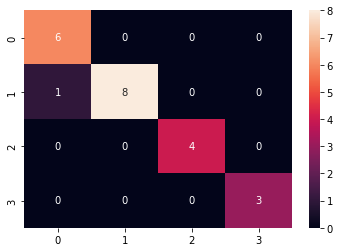

In [15]:
predict_gbm=gbm.predict(X_test)
predict_gbm

#argmax() method
y_pred_1 = [np.argmax(line) for line in predict_gbm]
y_pred_1

accuracy_score(y_test, y_pred_1)

cnf_matrix=confusion_matrix(y_test, y_pred_1)
cnf_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_1, labels=labeles)

f = sns.heatmap(cnf_matrix, annot=True)

print(classification_report(y_test, y_pred_1))

FEATURE IMPORTANT HASIL KLASIFIKASI ORIGINAL LIGHTGBM!!!!!!!!!!!!!!!!!

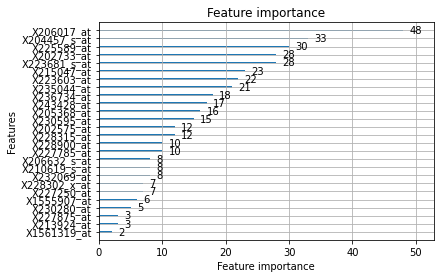

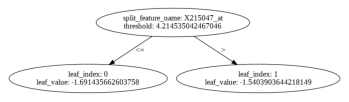

In [16]:
lgb.plot_importance(gbm)
lgb.plot_tree(gbm)

**ROC-AUC ORIGINAL**

In [17]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss', learning_rate = 0.1, max_depth = 1, num_leaves = 4)

In [18]:
clff=OneVsRestClassifier(clf)
y_proba=clff.fit(X_train, y_train).predict_proba(X_test)
y_proba

array([[0.64123076, 0.19416167, 0.02160707, 0.14300051],
       [0.22173891, 0.25403356, 0.26649828, 0.25772926],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ]])

HASIL PROBS

In [19]:
y_prob = clf.fit(X_train, y_train).predict_proba(X_test)
ybin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = ybin.shape[1]
CLASS_NAMES = [ 'Group 3', 'Group 4', 'SHH', 'WNT']
NUM_CLASSES = len(CLASS_NAMES)


In [20]:
print(y_prob)

[[1.01731306e-02 9.89510738e-01 2.15775425e-04 1.00356069e-04]
 [5.18922228e-01 3.77303047e-01 5.67048806e-02 4.70698447e-02]
 [4.49926231e-03 2.94746455e-01 9.70620566e-04 6.99783663e-01]
 [5.14424810e-04 1.38774933e-02 9.84552199e-01 1.05588320e-03]
 [9.53200758e-03 6.40182057e-03 9.82463481e-01 1.60269069e-03]
 [6.99991832e-04 4.26885226e-03 1.64495822e-03 9.93386198e-01]
 [2.41695271e-04 9.96873988e-01 2.31549623e-03 5.68820752e-04]
 [9.94058128e-01 3.88083999e-03 5.83234881e-04 1.47779713e-03]
 [9.63025172e-01 2.70648229e-02 6.55025930e-03 3.35974582e-03]
 [9.89370306e-01 9.25141594e-03 1.12530383e-03 2.52973770e-04]
 [5.00908608e-02 3.51962364e-02 8.88835082e-01 2.58778209e-02]
 [9.85975769e-01 8.51613610e-03 4.59698938e-03 9.11105840e-04]
 [4.82347476e-04 9.96695800e-01 1.45630193e-03 1.36555084e-03]
 [4.24620638e-05 9.98897343e-01 1.58723040e-04 9.01471833e-04]
 [3.99866283e-04 9.93724160e-01 1.45726047e-04 5.73024725e-03]
 [7.82452751e-03 4.23691438e-03 1.98448699e-03 9.859540

In [21]:
ybin

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

MULTICLASSOVA

In [22]:
clf2 = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclassova',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss', learning_rate = 0.1, max_depth = 1, num_leaves = 4)

In [23]:
y_pred = clf2.fit(X_train, y_train).predict(X_test)
y_pred

array([1, 0, 3, 2, 2, 3, 1, 0, 0, 0, 2, 0, 1, 1, 1, 3, 0, 0, 1, 1, 2, 1])

In [24]:
y_proba2 = clf2.fit(X_train, y_train).predict_proba(X_test)
y_proba2

array([[2.93279159e-02, 9.99515021e-01, 5.41616238e-05, 2.13144901e-04],
       [1.72798426e-01, 5.23225536e-02, 5.82265764e-03, 3.85356800e-02],
       [3.47381214e-03, 1.19133350e-01, 1.13522127e-03, 9.65793865e-01],
       [5.24376579e-05, 5.13561136e-02, 9.66853721e-01, 3.81529128e-04],
       [1.01296514e-01, 7.14245559e-03, 9.73649873e-01, 1.73446024e-03],
       [1.23222027e-03, 3.16782793e-03, 2.75430705e-03, 9.81818403e-01],
       [2.37580705e-05, 9.97912419e-01, 1.19291099e-02, 3.37346945e-03],
       [9.83899363e-01, 2.27322884e-03, 6.56549915e-04, 2.14385417e-03],
       [8.66531465e-01, 5.64509704e-02, 1.23291675e-02, 3.32832753e-03],
       [9.83899363e-01, 1.00621279e-02, 1.71955343e-03, 5.14706278e-04],
       [1.79987620e-02, 1.22068919e-03, 5.83127326e-01, 1.41976806e-03],
       [9.83899363e-01, 7.11561443e-03, 1.78988804e-02, 1.49615990e-03],
       [3.09881381e-04, 9.99941661e-01, 5.03026098e-02, 1.88579951e-03],
       [6.44849127e-05, 9.99656709e-01, 2.18998263e

In [47]:
y_prob = clf2.fit(X_train, y_train).predict_proba(X_test)
ybin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = ybin.shape[1]
CLASS_NAMES = [ 'Group 3', 'Group 4', 'SHH', 'WNT']
NUM_CLASSES = len(CLASS_NAMES)

In [48]:
y_prob.shape,ybin.shape

((22, 4), (22, 4))

In [49]:
y_prob

array([[2.93279159e-02, 9.99515021e-01, 5.41616238e-05, 2.13144901e-04],
       [1.72798426e-01, 5.23225536e-02, 5.82265764e-03, 3.85356800e-02],
       [3.47381214e-03, 1.19133350e-01, 1.13522127e-03, 9.65793865e-01],
       [5.24376579e-05, 5.13561136e-02, 9.66853721e-01, 3.81529128e-04],
       [1.01296514e-01, 7.14245559e-03, 9.73649873e-01, 1.73446024e-03],
       [1.23222027e-03, 3.16782793e-03, 2.75430705e-03, 9.81818403e-01],
       [2.37580705e-05, 9.97912419e-01, 1.19291099e-02, 3.37346945e-03],
       [9.83899363e-01, 2.27322884e-03, 6.56549915e-04, 2.14385417e-03],
       [8.66531465e-01, 5.64509704e-02, 1.23291675e-02, 3.32832753e-03],
       [9.83899363e-01, 1.00621279e-02, 1.71955343e-03, 5.14706278e-04],
       [1.79987620e-02, 1.22068919e-03, 5.83127326e-01, 1.41976806e-03],
       [9.83899363e-01, 7.11561443e-03, 1.78988804e-02, 1.49615990e-03],
       [3.09881381e-04, 9.99941661e-01, 5.03026098e-02, 1.88579951e-03],
       [6.44849127e-05, 9.99656709e-01, 2.18998263e

In [50]:
ybin

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

**ROC-AUC FOR EACH CLASS (THRESHOLDS)**

In [51]:
def compute_AUCs(ybin, y_prob):
	AUROCs = []
	y_np = ybin
	pred_np = y_prob
	for i in range(len(y_np[0])):
		AUROCs.append(roc_auc_score(y_np[:, i], pred_np[:, i]))
	return AUROCs

def compute_ROCs(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	results = {
		'fpr' : [],
		'tpr' : [],
		'thresholds': [],
		'gmeans': [],
		'idmax': [],
		'optimal_threshold': []
	}

	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		results['fpr'].append(fpr.tolist())
		results['tpr'].append(tpr.tolist())
		results['thresholds'].append(thresholds.tolist())
		results['gmeans'].append(gmeans.tolist())
		results['idmax'].append(int(ix))
		results['optimal_threshold'].append(float(thresholds[ix]))

	return results

def get_threshold(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	results = []
	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		results.append(thresholds[ix])

	return results

def create_roc_curve(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	colors = [
	'#0033cc', '#ff0000', '#ff9933', '#993399']

	linestyles = [
	'solid', 'dotted', 'dashed', 'dashdot']

	for i in range(len(y_np[0])):
		fpr, tpr, thresholds = roc_curve(y_np[:, i], pred_np[:, i])
		gmeans = np.sqrt(tpr * (1-fpr))
		ix = np.argmax(gmeans)
		plt.plot([0,1], [0,1], linestyle='--')
		plt.plot(fpr, tpr, linestyle=linestyles[i], color=colors[i], label='{} t={:.5f}'.format(CLASS_NAMES[i], thresholds[ix]))
		plt.scatter(fpr[ix], tpr[ix], marker='o', color=colors[i])

	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.legend()
	plt.show()


In [52]:
y_np = ybin
pred_np = y_prob
print(y_np)
print(pred_np)

[[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]
[[2.93279159e-02 9.99515021e-01 5.41616238e-05 2.13144901e-04]
 [1.72798426e-01 5.23225536e-02 5.82265764e-03 3.85356800e-02]
 [3.47381214e-03 1.19133350e-01 1.13522127e-03 9.65793865e-01]
 [5.24376579e-05 5.13561136e-02 9.66853721e-01 3.81529128e-04]
 [1.01296514e-01 7.14245559e-03 9.73649873e-01 1.73446024e-03]
 [1.23222027e-03 3.16782793e-03 2.75430705e-03 9.81818403e-01]
 [2.37580705e-05 9.97912419e-01 1.19291099e-02 3.37346945e-03]
 [9.83899363e-01 2.27322884e-03 6.56549915e-04 2.14385417e-03]
 [8.66531465e-01 5.64509704e-02 1.23291675e-02 3.32832753e-03]
 [9.83899363e-01 1.00621279e-02 1.71955343e-03 5.14706278e-04]
 [1.79987620e-02 1.22068919e-03 5.83127326e-01 1.41976806e-03]
 [9.83899363e-01 7.11561443e-03 1.78988804e-02 1.49615990e-03]
 

AUROCS GLOBAL

In [53]:
	AUROCs_global = compute_AUCs(ybin, y_prob)
	AUROCs_global_avg = np.array(AUROCs_global[:4]).mean()

	ROCs_global = compute_ROCs(ybin, y_prob)

	AUROCs_local = [0. for a in range(NUM_CLASSES)]
	AUROCs_local_avg = 0.
	AUROCs_fusion = [0. for a in range(NUM_CLASSES)]
	AUROCs_fusion_avg = 0.


In [54]:
print(AUROCs_global)
print(AUROCs_global_avg)
print(ROCs_global)


[1.0, 0.9743589743589743, 1.0, 1.0]
0.9935897435897436
{'fpr': [[0.0, 0.0, 0.0, 0.75, 0.875, 1.0], [0.0, 0.0, 0.0, 0.23076923076923078, 0.23076923076923078, 0.46153846153846156, 0.6153846153846154, 0.6923076923076923, 0.8461538461538461, 1.0], [0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]], 'tpr': [[0.0, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0], [0.0, 0.2222222222222222, 0.8888888888888888, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.25, 1.0, 1.0], [0.0, 0.6666666666666666, 1.0, 1.0]], 'thresholds': [[1.9838993629798396, 0.9838993629798395, 0.8665314647073082, 0.0002671263331146429, 6.44849126870935e-05, 2.375807049134699e-05], [1.9999416606535458, 0.999941660653546, 0.9361864655706832, 0.05645097043164827, 0.05232255360536622, 0.00954078695473273, 0.007142455585201055, 0.0071156144303264595, 0.0031678279295097515, 0.001220689191775057], [1.9827632323254065, 0.9827632323254065, 0.583127326321909, 2.823323770599957e-05], [1.9818184030728734, 0.9818184030728734, 0.965793864873

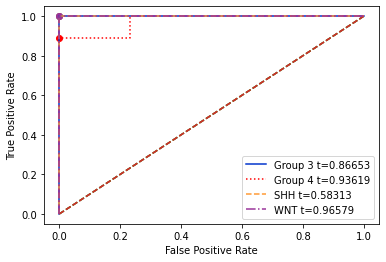

None


In [55]:
print(create_roc_curve(ybin,y_prob))

**PRECISION-RECALL CURVE**

In [56]:
def create_precision_recall_curve(ybin, y_prob):
	y_np = ybin
	pred_np = y_prob

	colors = [
	'#0033cc', '#ff0000', '#ff9933', '#993399']

	linestyles = [
	'solid', 'dotted', 'dashed', 'dashdot']

	for i in range(len(y_np[0])):
		precision, recall, thresholds = precision_recall_curve(y_np[:, i], pred_np[:, i])
		fscore = (2 * precision * recall) / (precision + recall)
		ix = np.argmax(fscore)
		plt.plot([0,1], [0,1], linestyle='--')
		plt.plot(recall, precision, linestyle=linestyles[i], color=colors[i], label='{} t={:.5f} F={:.3f}'.format(CLASS_NAMES[i], thresholds[ix], fscore[ix]))
		plt.scatter(recall[ix], precision[ix], marker='o', color=colors[i])

	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.legend()
	plt.show()

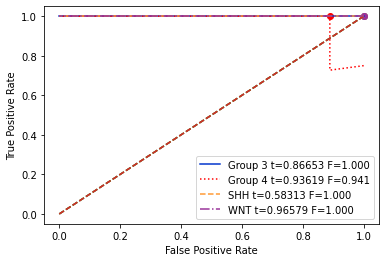

None


In [60]:
print(create_precision_recall_curve(ybin,y_prob))

**MODEL RESAMPLING DENGAN SMOTENC**

RESAMPLING DATA DENGAN SMOTENC

In [31]:
ovr = SMOTENC(random_state=0, categorical_features=[37,38,39], k_neighbors=2)
x_smotenc, y_smotenc = ovr.fit_resample(X_train, y_train.ravel())
x_smotenc.shape, y_smotenc.shape

((120, 40), (120,))

MELIHAT JUMLAH MASING-MASING KELAS SETELAH DIRESAMPLING

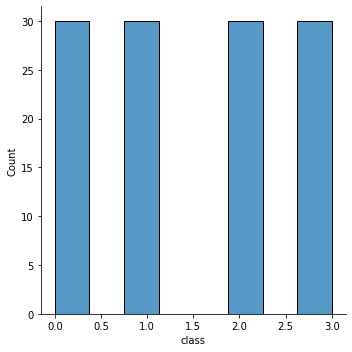

In [32]:
y_train_smotenc = pd.DataFrame(data=y_smotenc, columns=['class'])
sns.displot(y_train_smotenc, x="class")

MEMBANGUN MODEL SETELAH DIRESAMPLING

In [33]:
param_dict_smotenc = {
    'num_leaves': [4, 8, 12, 20],
    'max_depth': [1,2,3,4,5,6,7,8],
    'learning_rate':[0.1,0.3,0.5,0.7,0.9]
    }


clf_smotenc = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss')

gs_smotenc=GridSearchCV(clf_smotenc, param_dict_smotenc, scoring='accuracy', verbose=1,cv=5, n_jobs=1)
gs_smotenc.fit(x_smotenc,y_smotenc)
gs_smotenc.best_params_
gs_smotenc.best_score_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


0.9916666666666668

HASIL DENGAN RESAMPLING

In [34]:
predict_grid_smotenc = gs_smotenc.predict(X_test)
print("nilai f-1 score AFTER SMOTENC     : %0.3f"% metrics.f1_score(y_test, predict_grid_smotenc, average='macro'))
print("nilai akurasi AFTER SMOTENC        : %0.3f"% metrics.accuracy_score(y_test, predict_grid_smotenc))

print('Combination SMOTENC Results:',classification_report_imbalanced(y_test, predict_grid_smotenc))
print(confusion_matrix(y_test, predict_grid_smotenc))
print('Akurasi Combination SMOTENC = ', accuracy_score(y_test, predict_grid_smotenc))

nilai f-1 score AFTER SMOTENC     : 0.966
nilai akurasi AFTER SMOTENC        : 0.955
Combination SMOTENC Results:                    pre       rec       spe        f1       geo       iba       sup

          0       0.86      1.00      0.94      0.92      0.97      0.94         6
          1       1.00      0.89      1.00      0.94      0.94      0.88         9
          2       1.00      1.00      1.00      1.00      1.00      1.00         4
          3       1.00      1.00      1.00      1.00      1.00      1.00         3

avg / total       0.96      0.95      0.98      0.95      0.97      0.94        22

[[6 0 0 0]
 [1 8 0 0]
 [0 0 4 0]
 [0 0 0 3]]
Akurasi Combination SMOTENC =  0.9545454545454546


CONFUSSION MATRIX SETELAH DIRESAMPLING

['Class 0', 'Class 1', 'Class 2', 'Class 3']


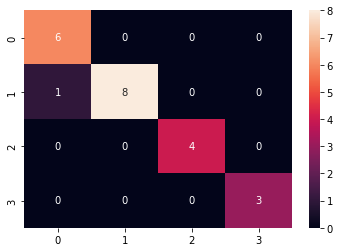

In [35]:
classes =[]
labeles=np.unique(y_train)
for v in labeles:
    classes.append('Class '+ str(v))
print(classes)
classes

cnf_matrix_smotenc = confusion_matrix(y_test, predict_grid_smotenc, labels=labeles)
cnf_matrix_smotenc

f = sns.heatmap(cnf_matrix_smotenc, annot=True)

****LGB TRAIN SETELAH RESAMPLING**********************************

DATASET LGB&CATEGORICAL FEATURE

In [36]:
lgb_train_smotenc = lgb.Dataset(x_smotenc, label= y_smotenc)
lgb_test_smotenc = lgb.Dataset(X_test, y_test)
cate_features = [37,38,39]

TRAINING MODEL

In [37]:
param_smotenc = {
'boosting_type': 'gbdt',
'objective': 'multiclass',
'metric': 'multi_logloss',
'num_class':4,
'max_depth':1,
'num_leaves':4,
'learning_rate':0.1
}

gbm_smotenc = lgb.train(
param_smotenc,
lgb_train_smotenc,
categorical_feature = cate_features,
num_boost_round=100,
valid_sets=[lgb_train_smotenc, lgb_test_smotenc],
early_stopping_rounds=10
)

gbm_smotenc.best_iteration
gbm_smotenc.best_score

[1]	training's multi_logloss: 1.20521	valid_1's multi_logloss: 1.22206
Training until validation scores don't improve for 10 rounds.
[2]	training's multi_logloss: 1.05938	valid_1's multi_logloss: 1.09034
[3]	training's multi_logloss: 0.938498	valid_1's multi_logloss: 0.98165
[4]	training's multi_logloss: 0.835813	valid_1's multi_logloss: 0.878748
[5]	training's multi_logloss: 0.74774	valid_1's multi_logloss: 0.7903
[6]	training's multi_logloss: 0.671218	valid_1's multi_logloss: 0.718275
[7]	training's multi_logloss: 0.60414	valid_1's multi_logloss: 0.65114
[8]	training's multi_logloss: 0.545252	valid_1's multi_logloss: 0.592084
[9]	training's multi_logloss: 0.493177	valid_1's multi_logloss: 0.543522
[10]	training's multi_logloss: 0.446944	valid_1's multi_logloss: 0.496887
[11]	training's multi_logloss: 0.405712	valid_1's multi_logloss: 0.455171
[12]	training's multi_logloss: 0.368939	valid_1's multi_logloss: 0.417886
[13]	training's multi_logloss: 0.335965	valid_1's multi_logloss: 0.38

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [37, 38, 39]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


defaultdict(dict,
            {'training': {'multi_logloss': 0.003073879993558828},
             'valid_1': {'multi_logloss': 0.05539193033691985}})

HASIL PREDIKSI SETELAH RESAMPLING

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           0.95        22
   macro avg       0.96      0.97      0.97        22
weighted avg       0.96      0.95      0.95        22



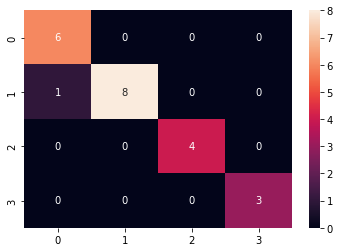

In [38]:
predict_gbm_smotenc=gbm_smotenc.predict(X_test)
predict_gbm_smotenc

#argmax() method
y_pred_smotenc = [np.argmax(line) for line in predict_gbm]
y_pred_smotenc

accuracy_score(y_test, y_pred_smotenc)

cnf_matrix_smotenc=confusion_matrix(y_test, y_pred_smotenc)
cnf_matrix_smotenc

cnf_matrix_smotenc = confusion_matrix(y_test, y_pred_smotenc, labels=labeles)

f = sns.heatmap(cnf_matrix_smotenc, annot=True)

print(classification_report(y_test, y_pred_smotenc))

FEATURE IMPORTANT HASIL KLASIFIKASI - RESAMPLING

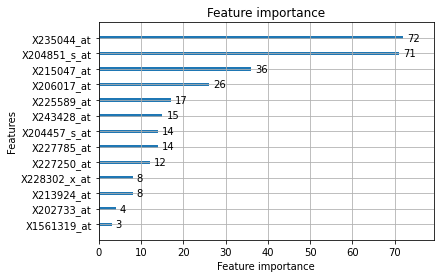

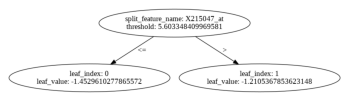

In [39]:
lgb.plot_importance(gbm_smotenc)
lgb.plot_tree(gbm_smotenc)


**ROC-AUC - AFTER RESAMPLING**

In [40]:
clf_smotenc = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                         colsample_bytree=1.0, n_estimators=100,
                         num_class=4, metric='multi_logloss', learning_rate = 0.1, max_depth = 1, num_leaves = 4)

HASIL PROBS

In [41]:
y_prob_smotenc = clf_smotenc.fit(x_smotenc, y_smotenc).predict_proba(X_test)
ybin_smotenc = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = ybin_smotenc.shape[1]


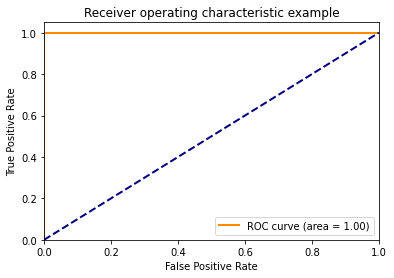

In [42]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybin_smotenc[:, i], y_prob_smotenc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybin_smotenc.ravel(), y_prob_smotenc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


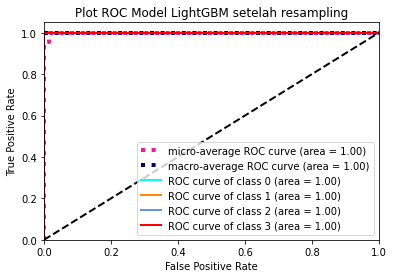

In [43]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Plot ROC Model LightGBM setelah resampling')
plt.legend(loc="lower right")
plt.show()

 **BANDINGKAN HASIL ORIGINAL DENGAN RESAMPLING**

In [44]:
#ORIGINAL
predict_grid = gs.predict(X_test)
print("nilai f-1 score     : %0.3f"% metrics.f1_score(y_test, predict_grid, average='macro'))
print("nilai akurasi        : %0.3f"% metrics.accuracy_score(y_test, predict_grid))

print('Original Results:',classification_report(y_test, predict_grid))
print(confusion_matrix(y_test, predict_grid))
print('Akurasi Original Result = ', accuracy_score(y_test, predict_grid))

nilai f-1 score     : 0.966
nilai akurasi        : 0.955
Original Results:               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           0.95        22
   macro avg       0.96      0.97      0.97        22
weighted avg       0.96      0.95      0.95        22

[[6 0 0 0]
 [1 8 0 0]
 [0 0 4 0]
 [0 0 0 3]]
Akurasi Original Result =  0.9545454545454546


In [45]:
#SMOTENC
predict_grid_smotenc = gs_smotenc.predict(X_test)
print("nilai f-1 score AFTER SMOTENC     : %0.3f"% metrics.f1_score(y_test, predict_grid_smotenc, average='macro'))
print("nilai akurasi AFTER SMOTENC        : %0.3f"% metrics.accuracy_score(y_test, predict_grid_smotenc))

print('Combination SMOTENC Results:',classification_report_imbalanced(y_test, predict_grid_smotenc))
print(confusion_matrix(y_test, predict_grid_smotenc))
print('Akurasi Combination SMOTENC = ', accuracy_score(y_test, predict_grid_smotenc))

nilai f-1 score AFTER SMOTENC     : 0.966
nilai akurasi AFTER SMOTENC        : 0.955
Combination SMOTENC Results:                    pre       rec       spe        f1       geo       iba       sup

          0       0.86      1.00      0.94      0.92      0.97      0.94         6
          1       1.00      0.89      1.00      0.94      0.94      0.88         9
          2       1.00      1.00      1.00      1.00      1.00      1.00         4
          3       1.00      1.00      1.00      1.00      1.00      1.00         3

avg / total       0.96      0.95      0.98      0.95      0.97      0.94        22

[[6 0 0 0]
 [1 8 0 0]
 [0 0 4 0]
 [0 0 0 3]]
Akurasi Combination SMOTENC =  0.9545454545454546


**ROC-AUC ORIGINAL - SMOTENC (PERBANDINGAN)**

In [46]:
#ORIGINAL
y_prob = clf.fit(X_train, y_train).predict_proba(X_test)
y_prob = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#smotenc
y_prob_smotenc = clf.fit(x_smotenc, y_smotenc).predict_proba(X_test)
y_prob_smotenc = y_prob_smotenc[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_smotenc)
roc_auc = auc(fpr, tpr)

probslgb=[y_prob, y_prob_smotenc]
models=["LIGTGBM sebelum sampling", "LIGTGBM SMOTENC"]

plt.figure(figsize=(10,7))
for idx,m in enumerate(models):
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probslgb[idx])
# Calculate Area under the curve to display on the plot
    roc_auc = auc(fpr, tpr)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m, roc_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display


ValueError: ignored